In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from sklearn import datasets, linear_model
from IPython.display import Image 

Lets Load our Data To a Dataframes, making exploratory analysis easier.

In [ ]:
df = pd.read_csv("train.csv")

If we look at the "count" in describe, we see that for some its not 1460, this means that we have missing values and need to find a way to do some preprocessing on such columns

In [ ]:
df.describe()

In [ ]:
print(df.columns)

In [24]:
df[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Seems like majority of our houses were built around 1980's to 2015 and as early as 1865!

In [ ]:
# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
plt.title("Number of Houses built by Year")
plt.xlabel("Year")
plt.ylabel("Count")
df["YearBuilt"].hist()

Majority of the House prices seems to fall between 1,500,000 to 2,000,000

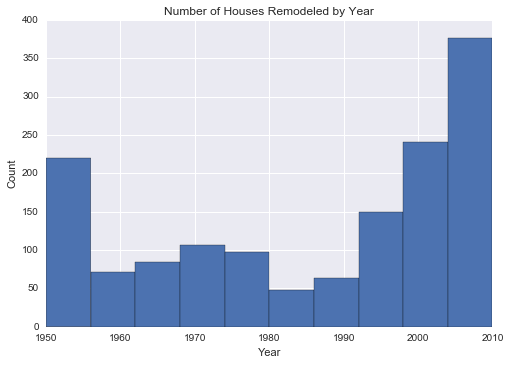

In [26]:
plt.title("Number of Houses Remodeled by Year")
plt.xlabel("Year")
plt.ylabel("Count")
df["YearRemodAdd"].hist()

In [ ]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("SalePrice","LotArea",data=df, kind="reg", color="r", size=7)

In [ ]:
df[['LotArea']].sort('LotArea',ascending=False)

In [ ]:
sub_df = df[['LotFrontage','LotArea','YearBuilt',
             'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', u'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 
              'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt','GarageCars', 'GarageArea', 
    'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MoSold', 'YrSold']]
sub_df.describe()

In [ ]:
sub_df.LotFrontage[sub_df.LotFrontage.notnull()].hist()
print(sub_df.LotFrontage.mean(),sub_df.LotFrontage.std())
sub_lotArea = sub_df.LotFrontage.fillna(sub_df.LotFrontage.mean())
sub_lotArea.hist()
print(sub_lotArea.mean(),sub_lotArea.std())

In [ ]:
sub_df.MasVnrArea[sub_df.MasVnrArea.isnull()]
#sub_df.MasVnrArea[sub_df.MasVnrArea.notnull()].hist()
print(sub_df.MasVnrArea.mean(),sub_df.MasVnrArea.std())
sub_df.MasVnrArea[sub_df.MasVnrArea.notnull()].mean()
sub_MasVnrArea = sub_df.MasVnrArea.fillna(sub_df.MasVnrArea.mean())
#sub_MasVnrArea.hist()
print(sub_MasVnrArea.mean(),sub_MasVnrArea.std())

In [ ]:
sub_df[['2ndFlrSF','LowQualFinSF','GrLivArea', u'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 
              'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt']].describe()

sub_df.GarageYrBlt[sub_df.GarageYrBlt.isnull()]
print(sub_df.GarageYrBlt.value_counts().to_dict())

In [ ]:
X_df = df[['LotFrontage','LotArea','YearBuilt',
             'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
             'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea', u'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 
    'TotRmsAbvGrd','Fireplaces','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
    'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MoSold', 'YrSold','SalePrice']]
X_df.LotFrontage = sub_lotArea
X_df.MasVnrArea = sub_MasVnrArea
X_df.describe()

In [ ]:
four_df = X_df[['LotArea','FullBath','TotRmsAbvGrd','SalePrice']]
sns.pairplot(four_df)

In [ ]:
four_df = X_df[['YearBuilt','YearRemodAdd','TotRmsAbvGrd','SalePrice']]
sns.pairplot(four_df)

In [ ]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot("SalePrice","TotRmsAbvGrd",data=df, kind="reg", color="r", size=7)

In [ ]:
X_df[['TotRmsAbvGrd','SalePrice']].sort('SalePrice',ascending=False)

In [ ]:
X_df['SalePrice'].nlargest(3)

In [ ]:
X_df['SalePrice'].nsmallest(3)

In [ ]:
X_df.iloc[691]

In [ ]:
X_df.iloc[495]

In [ ]:
X_df[['YearBuilt','YearRemodAdd','YrSold','TotRmsAbvGrd','LotArea','LotFrontage','SalePrice']].sort('SalePrice'
                            ,ascending=False)

In [ ]:
sub_data  = X_df[['YearBuilt','YearRemodAdd','YrSold','TotRmsAbvGrd','LotArea','LotFrontage',"SalePrice"]]
x = sub_data[['YearBuilt','YearRemodAdd','YrSold','TotRmsAbvGrd','LotArea','LotFrontage']]
X_train = x[:-20]
X_test = x[-20:]

# Split the targets into training/testing sets
y_train = sub_data.SalePrice[:-20]
y_test = sub_data.SalePrice[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))
